In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ImportDataset

In [2]:
data=pd.read_csv('Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [4]:
data.shape

(400, 11)

In [5]:
data.axes

[RangeIndex(start=0, stop=400, step=1),
 Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
        'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
       dtype='object')]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# frequency distribution of values in variables
for col in data.columns:
    print(f'\nThe {col} variable with value counts:\n')
    print(data[col].value_counts())


The Sales variable with value counts:

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

The CompPrice variable with value counts:

121    16
122    14
131    14
123    13
115    12
       ..
94      1
161     1
97      1
88      1
85      1
Name: CompPrice, Length: 73, dtype: int64

The Income variable with value counts:

69     11
42     10
32      8
100     8
67      7
       ..
27      1
114     1
43      1
112     1
23      1
Name: Income, Length: 98, dtype: int64

The Advertising variable with value counts:

0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
8      11
14     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
23      2
22      2
24      1
25      1
26      1
29      1
21      1
Name: Advertising, dtype: int64

The Population variable with value counts:

276    4
148    4
237 

(array([[ 96.,   0.,  85.,   0.,   0., 219.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 282.,   0., 118.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0., 258.,   0., 142.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 3 BarContainer objects>)

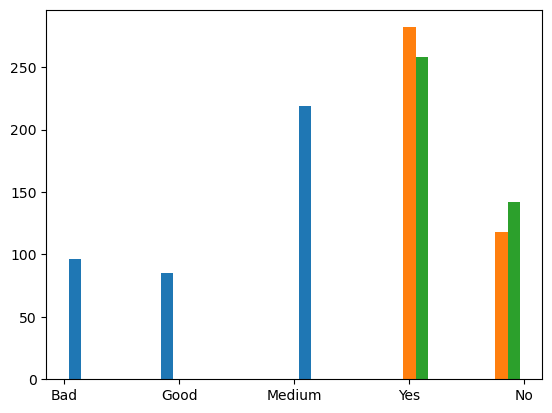

In [8]:
# find the categorical variables
categorical=[var for var in data.columns if data[var].dtypes=="O"]
categorical
plt.hist(data[categorical],histtype='bar')

Missing values in variables

In [9]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
numerical=[var for var in data.columns if data[var].dtypes!="O"]
numerical

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

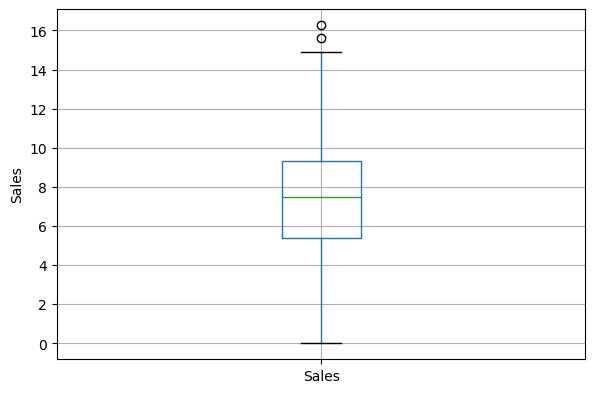

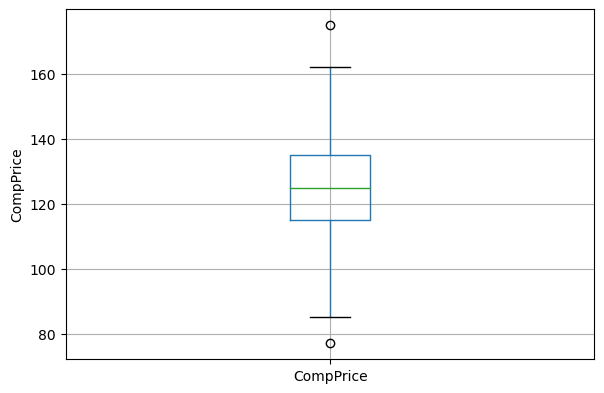

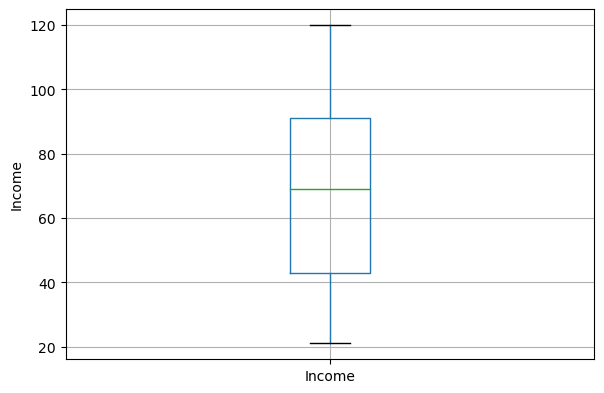

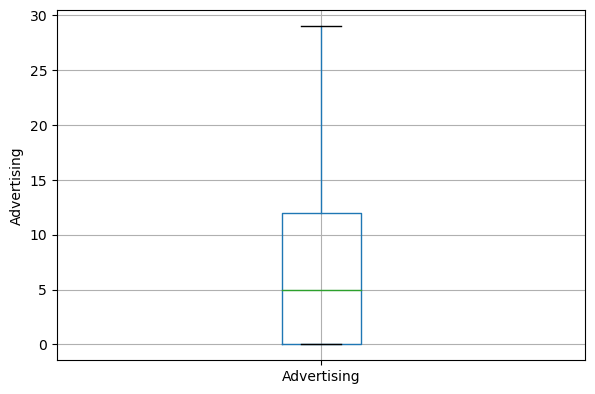

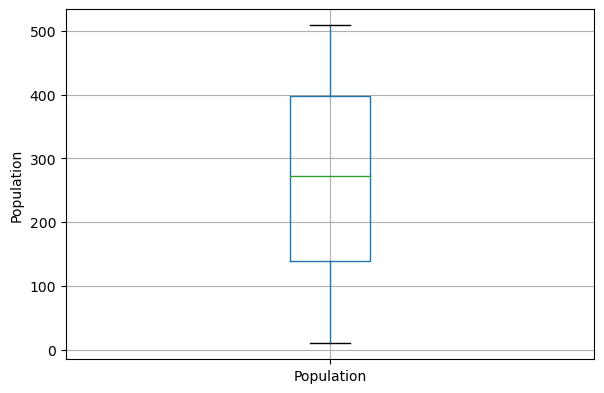

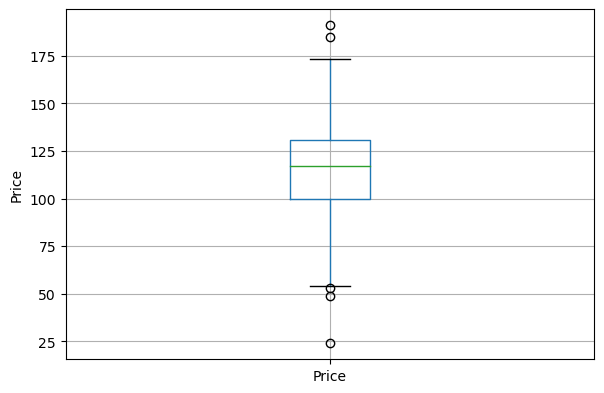

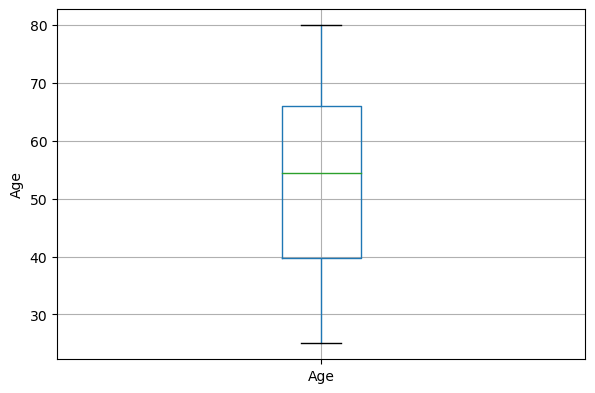

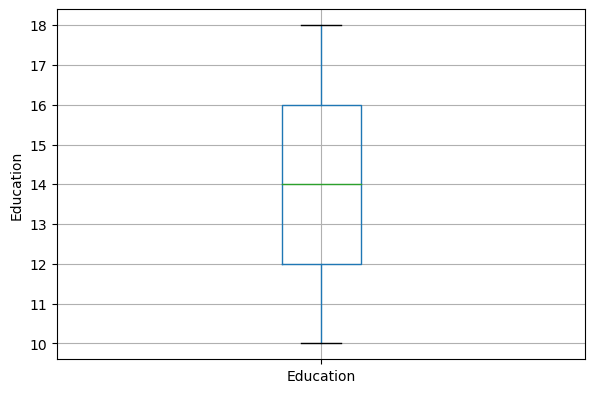

In [11]:
i=0
for var in numerical:
    plt.figure(figsize=(15,10))

    plt.subplot(2,2, i+1)
    fig = data.boxplot(column=var)
    fig.set_ylabel(var)

Sales


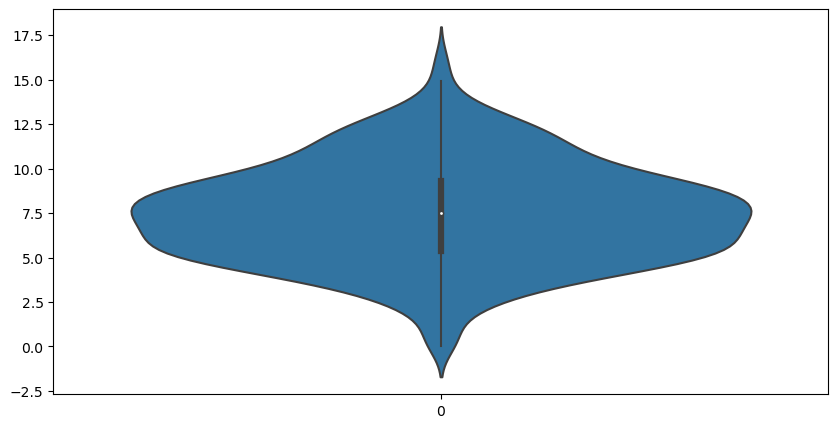

CompPrice


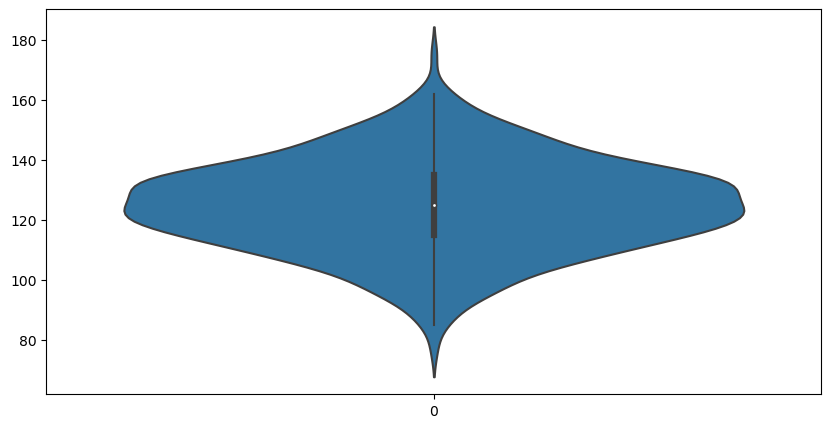

Income


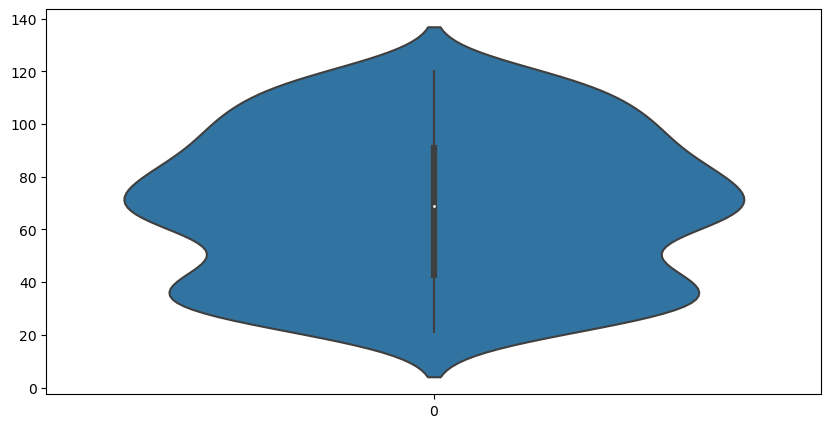

Advertising


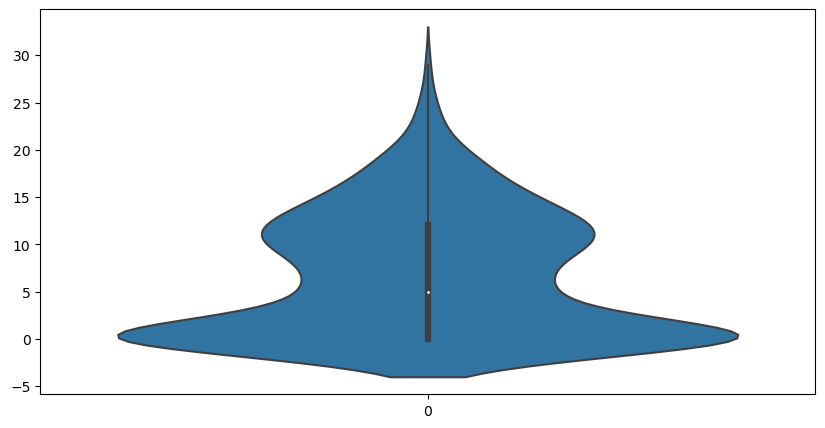

Population


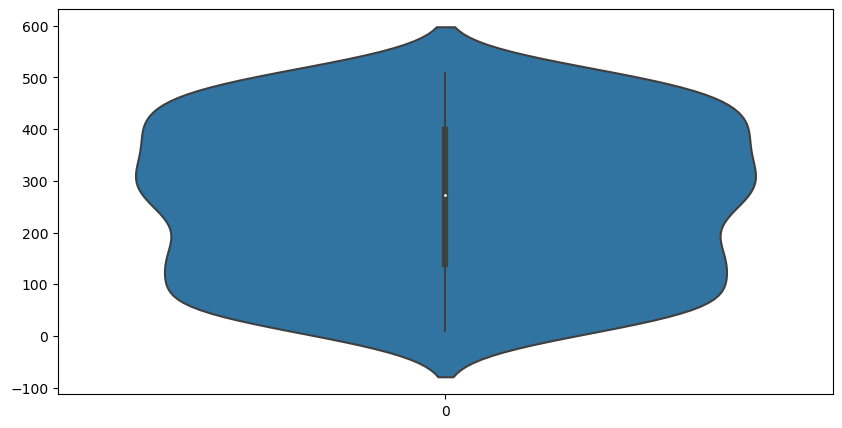

Price


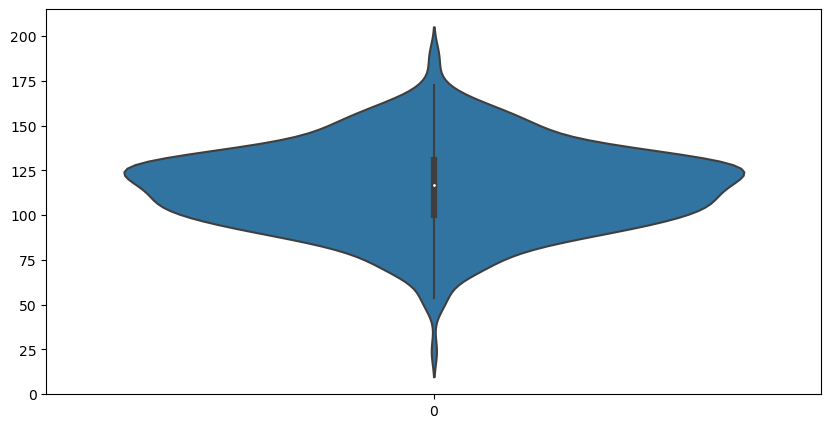

Age


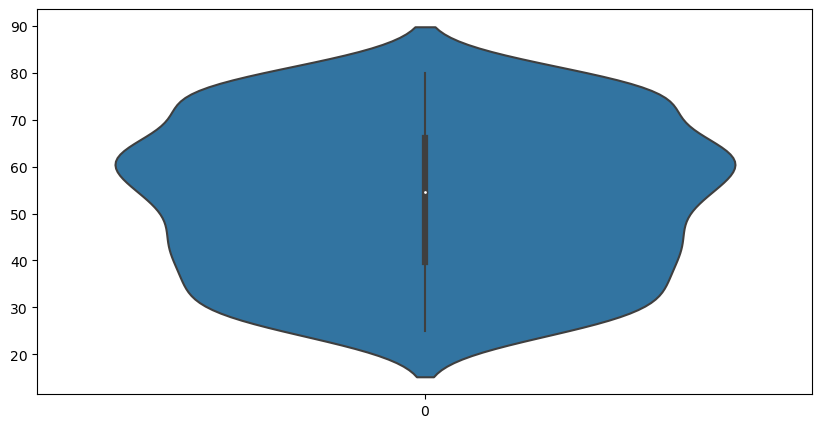

Education


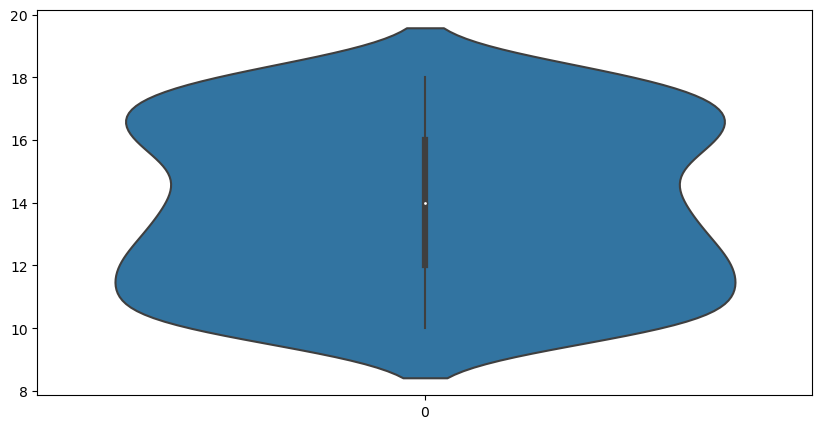

In [12]:
for col in numerical:
    plt.figure(figsize = (10,5))
    ax= sns.violinplot(data[col],scale="area")
    print(col)
    plt.show()

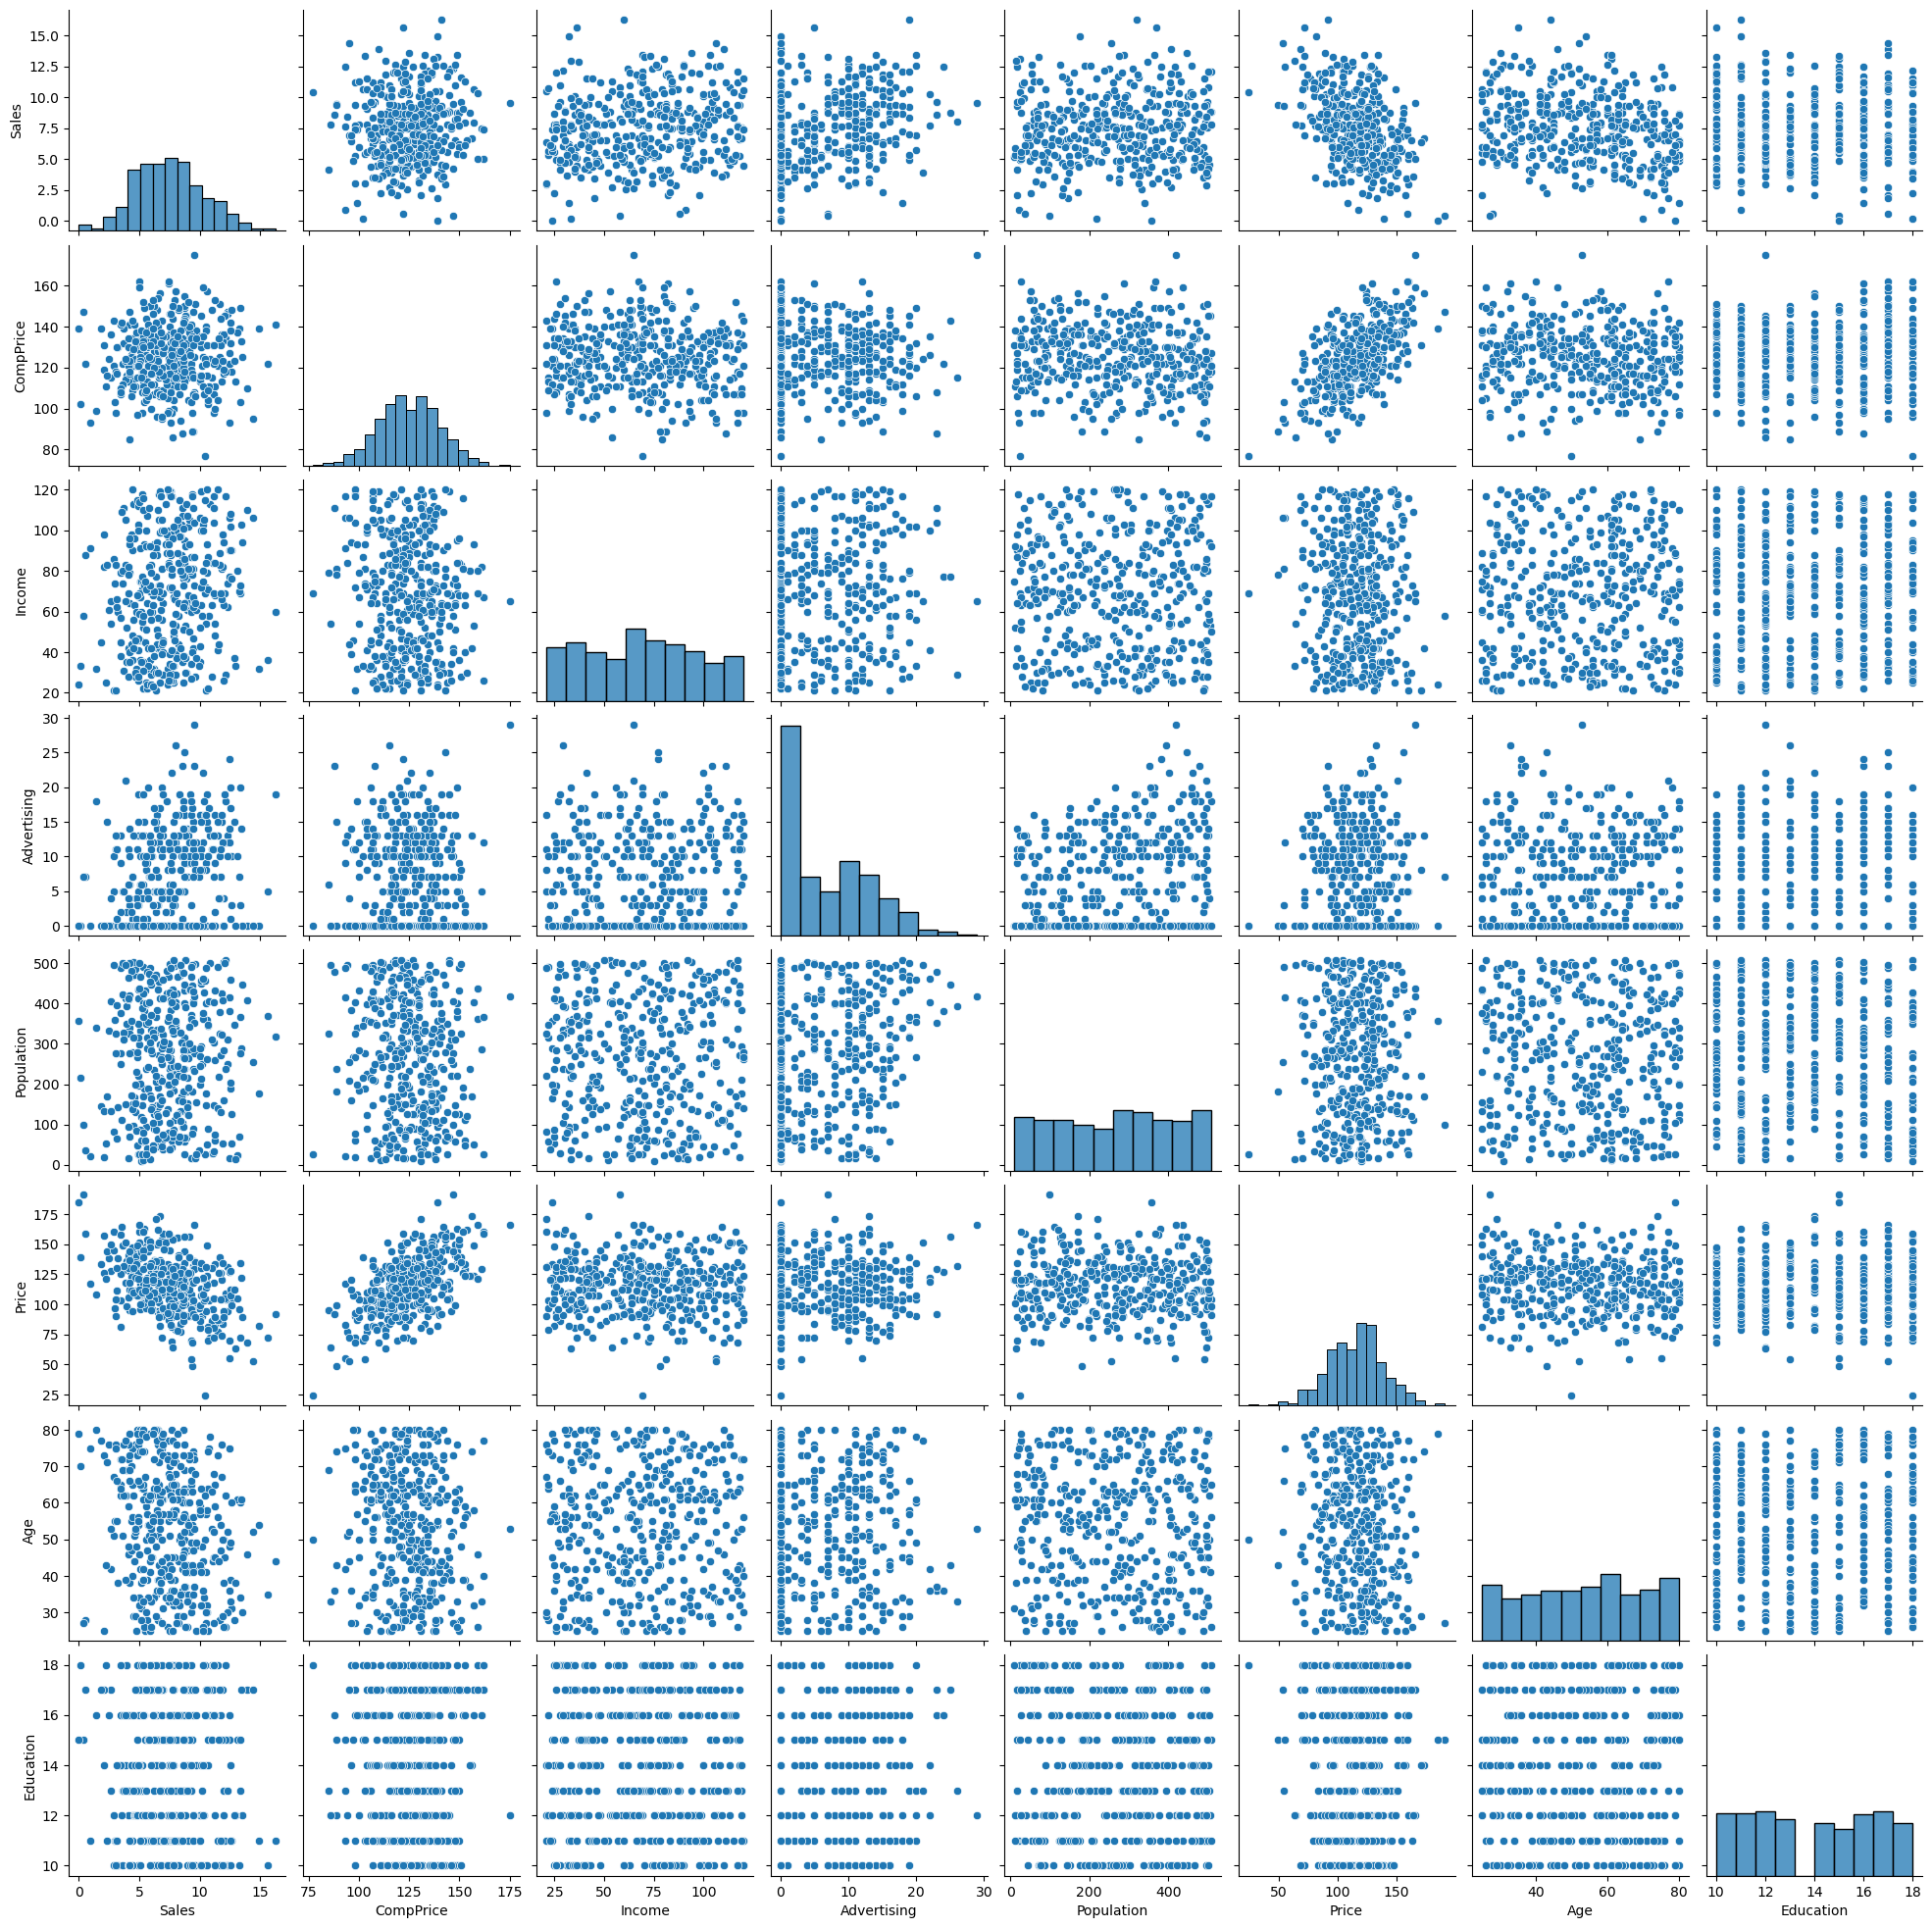

In [13]:
# pairplot
sns.pairplot(data,x_vars=numerical,y_vars=numerical)

# Correlation of Numerical Variable

In [14]:
a

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [15]:
data.describe(percentiles=[0.25,0.3,0.5,0.6,0.75,0.9]).T

,count,mean,std,min,25%,30%,50%,60%,75%,90%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,5.867,7.49,8.078,9.32,11.3,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,117.000,125.00,130.000,135.00,145.0,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,48.000,69.00,77.000,91.00,107.0,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,0.000,5.00,8.400,12.00,16.0,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,160.000,272.00,317.800,398.50,467.0,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,104.000,117.00,122.000,131.00,146.0,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,43.000,54.50,60.000,66.00,76.0,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,12.000,14.00,15.000,16.00,17.1,18.00


In [16]:
data['Sales'].describe(percentiles=[0,0.33,0.66,1]).T

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
0%         0.000000
33%        6.030000
50%        7.490000
66%        8.656800
100%      16.270000
max       16.270000
Name: Sales, dtype: float64

In [17]:
data['sale'] = pd.cut(x=data['Sales'],
                     bins=[0, 6, 9, 16.27],
                     labels=[0,1,2],duplicates='drop')

In [18]:
data['sale'].value_counts()

1    157
0    129
2    113
Name: sale, dtype: int64

In [19]:
data['ShelveLoc']=data['ShelveLoc'].map({'Bad':3,'Medium':2,'Good':1})

In [20]:
data.drop('Sales',axis=1,inplace=True)

In [21]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,3,42,17,Yes,Yes,2
1,111,48,16,260,83,1,65,10,Yes,Yes,2
2,113,35,10,269,80,2,59,12,Yes,Yes,2
3,117,100,4,466,97,2,55,14,Yes,Yes,1
4,141,64,3,340,128,3,38,13,Yes,No,0


In [22]:
data.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.038549,-0.100239,0.025197
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0.053465,-0.004670,-0.056855
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.056552,-0.004557,-0.033594
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0.020614,-0.042663,-0.106378
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.050924,-0.102177,0.011747
ShelveLoc,-0.038549,0.053465,-0.056552,0.020614,-0.050924,1.000000,-0.014149,0.025723
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,-0.014149,1.000000,0.006488
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.025723,0.006488,1.000000


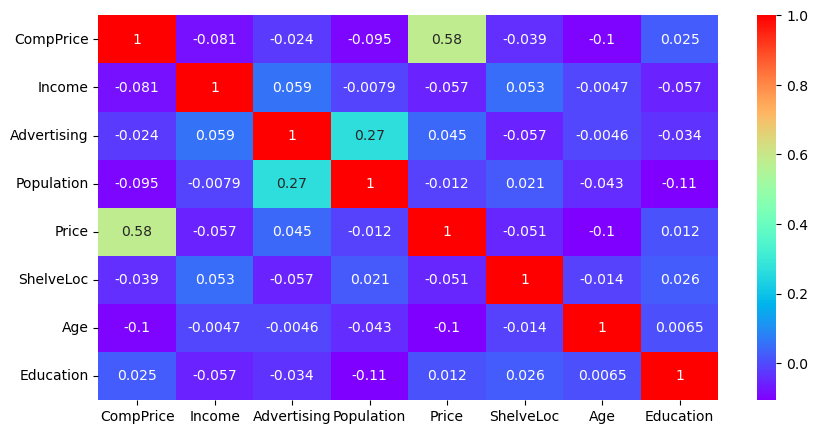

In [23]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [24]:
data['sale'].value_counts()

1    157
0    129
2    113
Name: sale, dtype: int64

In [25]:
data[data['sale'].isnull()]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
174,139,24,0,358,185,2,79,15,No,No,NaN


In [26]:
X=data.drop(['sale'],axis=1)
y=data['sale']

In [27]:
y.head()

0    2
1    2
2    2
3    1
4    0
Name: sale, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [29]:
y_train[y_train.isnull()]

174    NaN
Name: sale, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [30]:
y_test[y_test.isnull()]

Series([], Name: sale, dtype: category
Categories (3, int64): [0 < 1 < 2])

In [31]:
# check the shape of X_train and X_test
X_test.shape,X_test.shape

((80, 10), (80, 10))

# Feature Engineering

In [32]:
X_train.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc       int64
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [33]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,117,100,4,466,97,2,55,14,Yes,Yes
18,110,110,0,408,68,1,46,17,No,Yes
202,121,78,4,413,130,3,46,10,No,Yes
250,137,105,10,435,156,1,72,14,Yes,Yes
274,135,93,2,67,119,2,34,11,Yes,Yes


In [34]:
X_test.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,98,21,11,326,90,3,76,11,No,Yes
280,121,86,10,496,145,3,51,10,Yes,Yes
33,114,38,13,317,128,1,50,16,Yes,Yes


In [35]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((320, 10), (320,), (80, 10), (80,))

In [36]:
# encode variables
X_train=pd.get_dummies(X_train,drop_first=True,columns=['Urban','US'])

In [37]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
3,117,100,4,466,97,2,55,14,1,1
18,110,110,0,408,68,1,46,17,0,1
202,121,78,4,413,130,3,46,10,0,1
250,137,105,10,435,156,1,72,14,1,1
274,135,93,2,67,119,2,34,11,1,1


In [38]:
X_test=pd.get_dummies(X_test,drop_first=True,columns=['Urban','US'])

In [39]:
X_test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
209,98,21,11,326,90,3,76,11,0,1
280,121,86,10,496,145,3,51,10,1,1
33,114,38,13,317,128,1,50,16,1,1
210,125,41,2,357,123,3,47,14,0,1
93,145,30,0,67,104,2,55,17,1,0


In [40]:
# encode the categorical values in the variable
# y_train.replace({'Low':0,'Middle':1,'High':2},inplace=True)

In [41]:
y_train.fillna(0,inplace=True)

In [42]:
# y_test.replace({'Low':0,'Middle':1,'High':2},inplace=True,)

In [43]:
y_test.fillna(0,inplace=True)

In [44]:
X_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
209,98,21,11,326,90,3,76,11,0,1
280,121,86,10,496,145,3,51,10,1,1
33,114,38,13,317,128,1,50,16,1,1
210,125,41,2,357,123,3,47,14,0,1
93,145,30,0,67,104,2,55,17,1,0
...,...,...,...,...,...,...,...,...,...,...
246,120,56,20,266,90,3,78,18,1,1
227,113,64,10,68,101,2,57,16,1,1
369,135,100,22,463,122,2,36,14,1,1
176,138,107,9,480,154,2,47,11,0,1


In [45]:
y_train

3      1
18     2
202    0
250    2
274    1
      ..
71     1
106    0
270    2
348    2
102    0
Name: sale, Length: 320, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [46]:
y_test

209    0
280    0
33     1
210    0
93     1
      ..
246    1
227    1
369    2
176    0
289    1
Name: sale, Length: 80, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [47]:
y_train.value_counts()

1    126
0    107
2     87
Name: sale, dtype: int64

In [48]:
y_test.value_counts()

1    31
2    26
0    23
Name: sale, dtype: int64

In [49]:
y_test.value_counts()

1    31
2    26
0    23
Name: sale, dtype: int64

# DT Classifier with criterion gini index

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# instantiate the DecisionTreeClassifier model with criterion gini index
DT=DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_leaf_nodes=15,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=15, min_samples_split=5, random_state=42)

[Text(0.29642857142857143, 0.9375, 'x[5] <= 1.5\ngini = 0.659\nsamples = 320\nvalue = [107, 126, 87]'),
 Text(0.11428571428571428, 0.8125, 'x[4] <= 135.0\ngini = 0.481\nsamples = 64\nvalue = [2, 21, 41]'),
 Text(0.05714285714285714, 0.6875, 'gini = 0.365\nsamples = 50\nvalue = [0, 12, 38]'),
 Text(0.17142857142857143, 0.6875, 'gini = 0.52\nsamples = 14\nvalue = [2, 9, 3]'),
 Text(0.4785714285714286, 0.8125, 'x[4] <= 94.5\ngini = 0.631\nsamples = 256\nvalue = [105, 105, 46]'),
 Text(0.2857142857142857, 0.6875, 'x[6] <= 31.5\ngini = 0.545\nsamples = 41\nvalue = [2, 19, 20]'),
 Text(0.22857142857142856, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.34285714285714286, 0.5625, 'gini = 0.542\nsamples = 35\nvalue = [2, 19, 14]'),
 Text(0.6714285714285714, 0.6875, 'x[5] <= 2.5\ngini = 0.596\nsamples = 215\nvalue = [103, 86, 26]'),
 Text(0.45714285714285713, 0.5625, 'x[2] <= 13.5\ngini = 0.613\nsamples = 151\nvalue = [54, 73, 24]'),
 Text(0.3142857142857143, 0.4375, 'x[4] <= 13

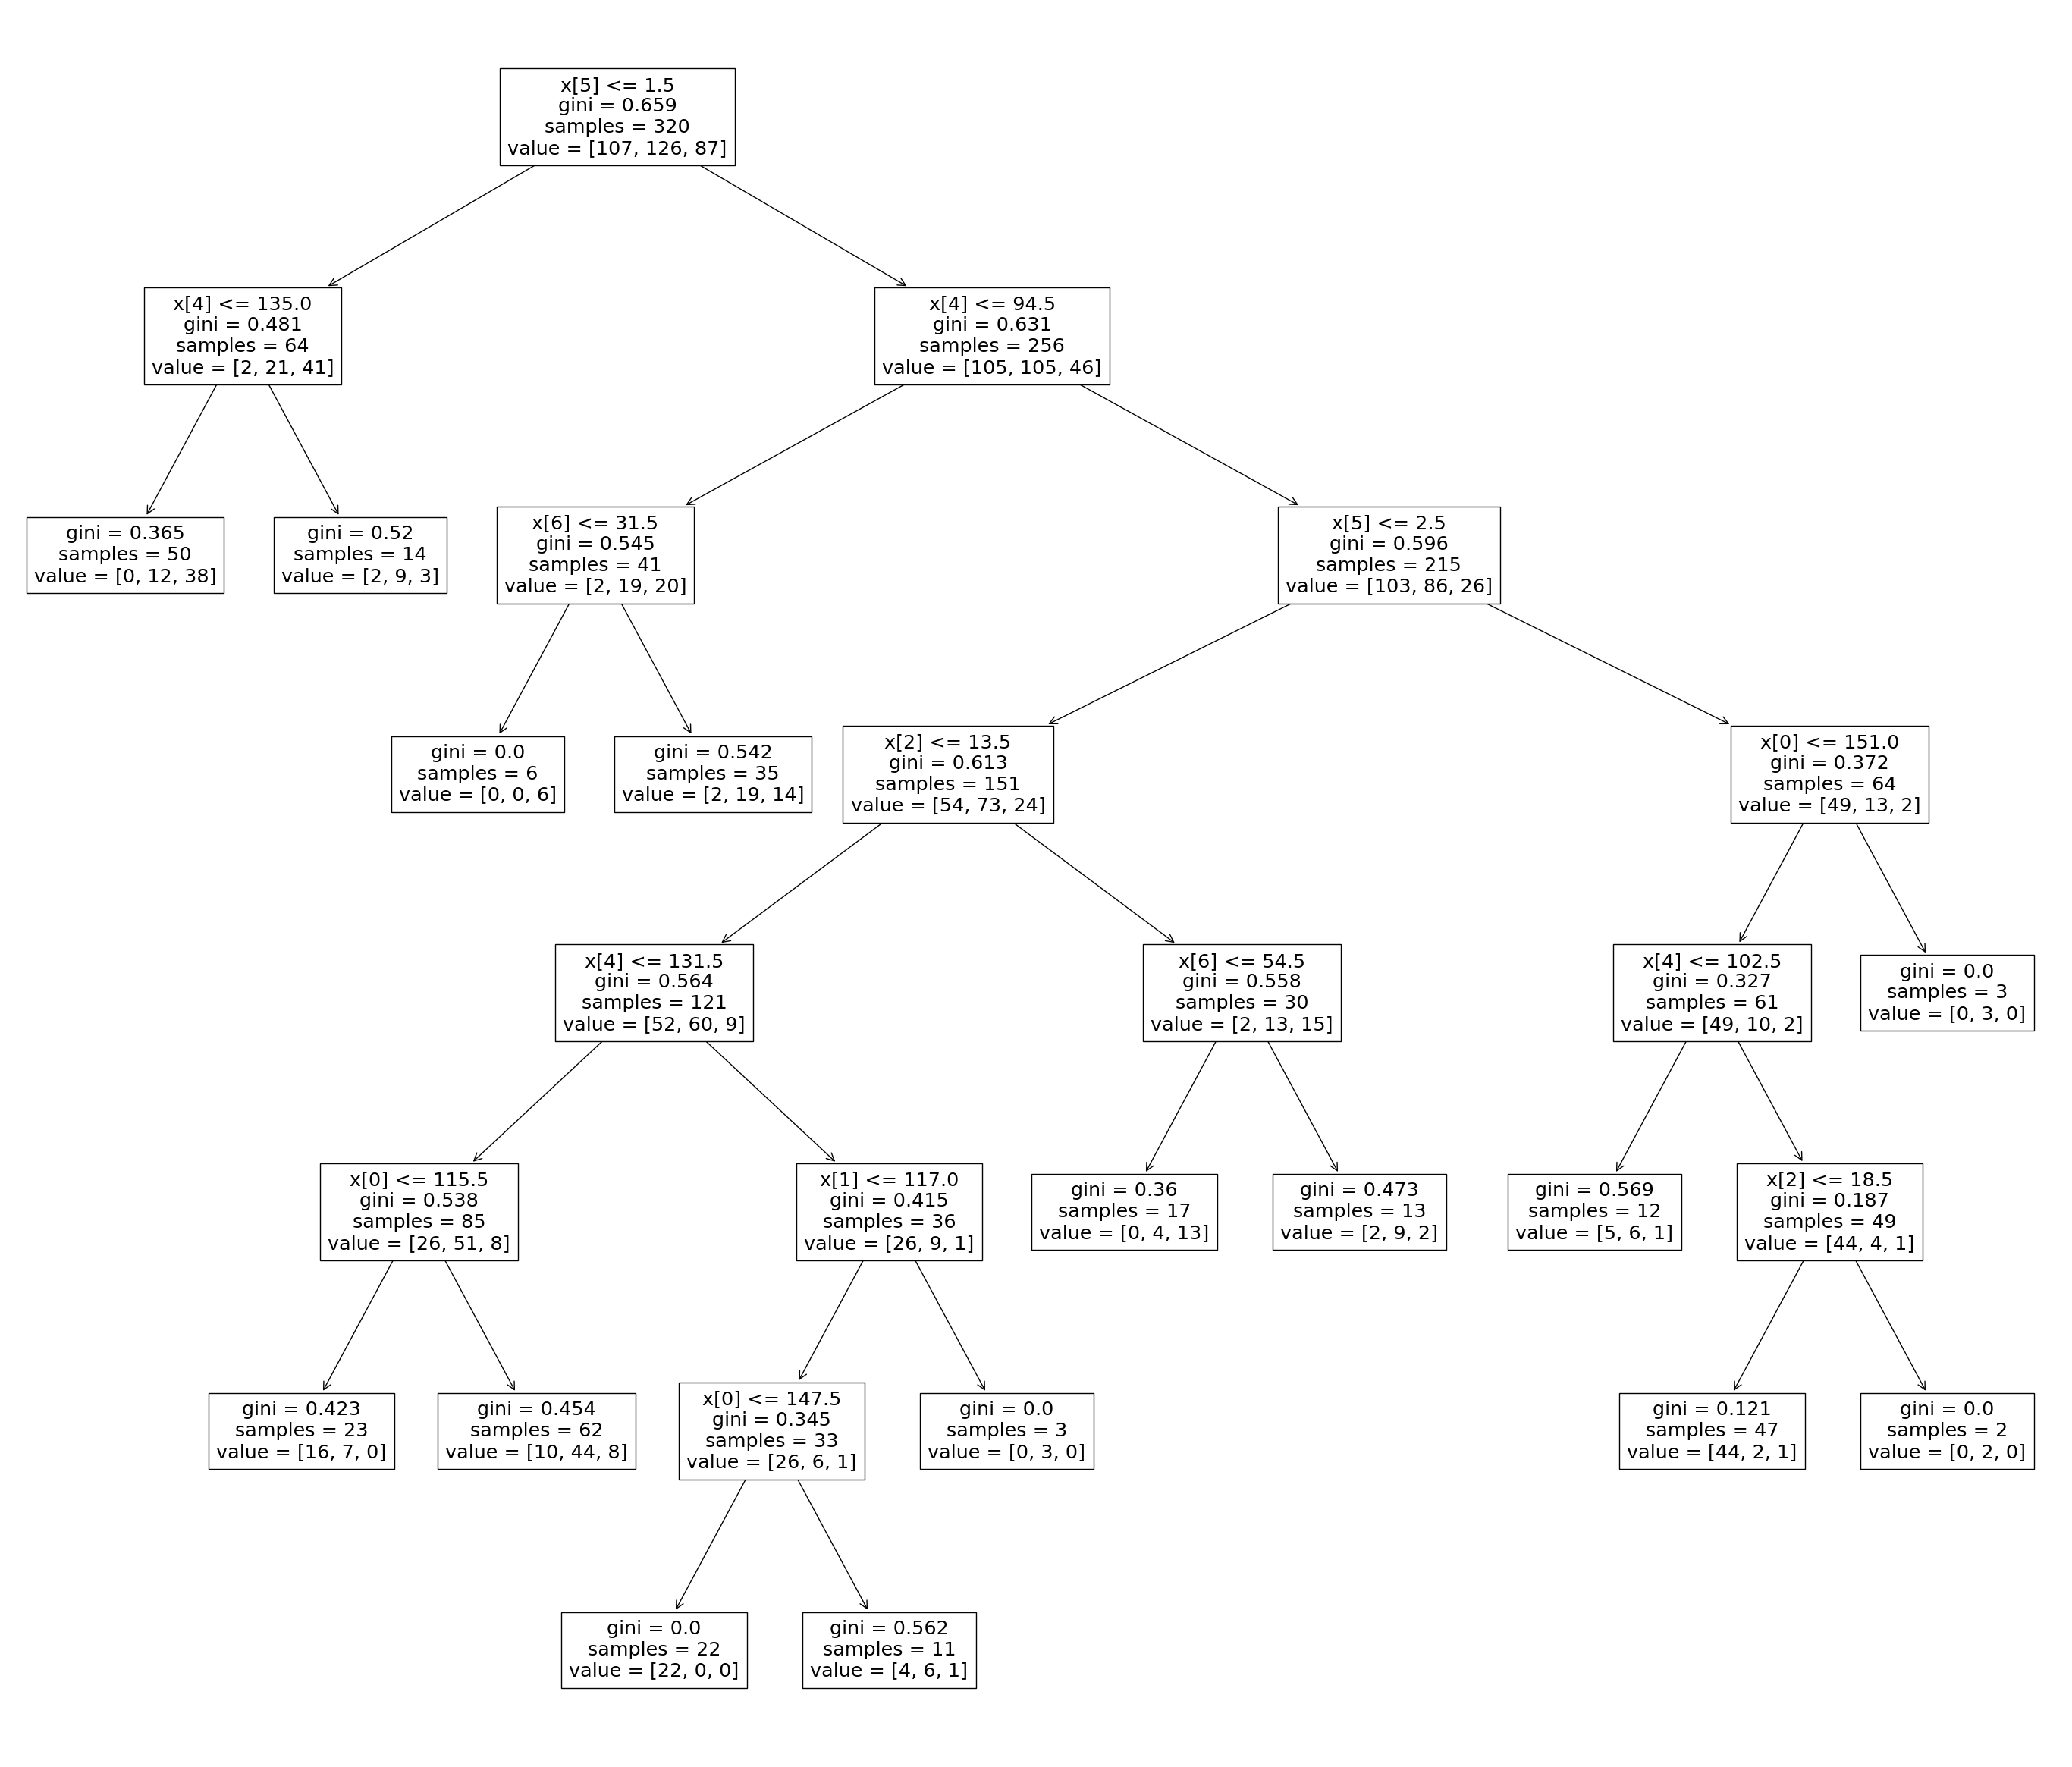

In [52]:
from sklearn import tree
fig = plt.figure(figsize=(35,30))
tree.plot_tree(model)

In [53]:
X_test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
209,98,21,11,326,90,3,76,11,0,1
280,121,86,10,496,145,3,51,10,1,1
33,114,38,13,317,128,1,50,16,1,1
210,125,41,2,357,123,3,47,14,0,1
93,145,30,0,67,104,2,55,17,1,0


In [54]:
# predict the test set result with criterion gini index
y_pred=model.predict(X_test)
y_test

209    0
280    0
33     1
210    0
93     1
      ..
246    1
227    1
369    2
176    0
289    1
Name: sale, Length: 80, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [55]:
# Check Accuracy score with criterion gini index

from sklearn.metrics import accuracy_score

# print(f'Model accuracy score with criterion gini index:{accuracy_score(y_test,y_pred)}')

In [56]:
accuracy_score(y_test,y_pred)

0.65

In [57]:
model.score(X_train,y_train)

0.75

In [58]:
model.score(X_test,y_test)

0.65

# Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
# sns.he
atmap(cm,annot=True)
cm

array([[16,  7,  0],
       [ 5, 20,  6],
       [ 1,  9, 16]], dtype=int64)

In [60]:
cm_df=pd.DataFrame(cm,columns=[0,1,2],index=[0,1,2])

<Axes: >

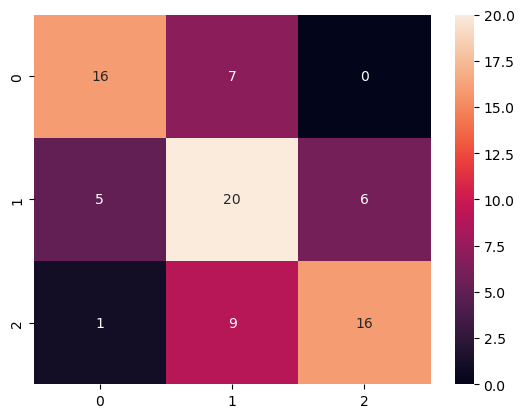

In [61]:
sns.heatmap(cm_df,annot=True)

In [62]:
# TP=(0,0)=22,28,6
# TN=(1,1),(2,1),(1,2),(2,2)=42,28,66
# FP=(0,1)(0,2)=11,9,4
# FN=(1,0),(2,0)=5,15,4

# Classification Report

In [66]:
# from sklearn import tree
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.56      0.65      0.60        31
           2       0.73      0.62      0.67        26

    accuracy                           0.65        80
   macro avg       0.67      0.65      0.66        80
weighted avg       0.66      0.65      0.65        80



# Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [69]:
# Create the parameter grid based on the results of random search 
param={
    'criterion':['gini','entropy','log-loss'],
    'splitter':["best", "random"],
    'max_depth':range(1,15)
}

In [70]:
# Instantiate the grid search model
grid=GridSearchCV(DT,param_grid=param,cv=10,n_jobs=-1, verbose=1, scoring = "accuracy")

In [71]:
%%time
grid.fit(X_train,y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
CPU times: total: 500 ms
Wall time: 5.97 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log-loss'],
                         'max_depth': range(1, 15),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [72]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [73]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}

In [74]:
grid.best_score_

0.6125

In [75]:
y_pred=grid.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.5875

In [77]:
score_df=pd.DataFrame(grid.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003125,0.006251,0.003125,0.006250,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.46875,0.37500,...,0.37500,0.46875,0.40625,0.43750,0.31250,0.43750,0.50000,0.425000,0.054486,56
1,0.006251,0.007656,0.006250,0.007655,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.46875,0.56250,...,0.59375,0.50000,0.40625,0.46875,0.31250,0.43750,0.53125,0.475000,0.076291,52
2,0.004687,0.007160,0.001562,0.004687,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.53125,0.34375,...,0.43750,0.50000,0.46875,0.40625,0.37500,0.43750,0.40625,0.443750,0.060596,54
3,0.006250,0.007654,0.000000,0.000000,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.62500,0.56250,...,0.59375,0.56250,0.56250,0.56250,0.37500,0.43750,0.59375,0.556250,0.084779,31
4,0.003124,0.006248,0.003125,0.006250,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.50000,0.50000,...,0.46875,0.59375,0.53125,0.53125,0.46875,0.46875,0.59375,0.515625,0.044743,48


In [78]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv=RandomizedSearchCV(estimator=DT,param_distributions=param,cv=10,random_state=42)

In [79]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log-loss'],
                                        'max_depth': range(1, 15),
                                        'splitter': ['best', 'random']})

In [80]:
tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=12)

In [81]:
tree_cv.best_params_

{'splitter': 'best', 'max_depth': 12, 'criterion': 'gini'}

In [82]:
tree_cv.best_score_

0.59375

In [83]:
tree_cv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log-loss'],
                                        'max_depth': range(1, 15),
                                        'splitter': ['best', 'random']})>

In [84]:
Score=pd.DataFrame(tree_cv.cv_results_)
Score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.0,0.0,best,10,log-loss,"{'splitter': 'best', 'max_depth': 10, 'criteri...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0.000000,0.000000,0.0,0.0,random,5,log-loss,"{'splitter': 'random', 'max_depth': 5, 'criter...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,0.000000,0.000000,0.0,0.0,best,11,log-loss,"{'splitter': 'best', 'max_depth': 11, 'criteri...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,0.004687,0.007160,0.0,0.0,best,4,entropy,"{'splitter': 'best', 'max_depth': 4, 'criterio...",0.625,0.5,...,0.5,0.46875,0.53125,0.5625,0.375,0.53125,0.75,0.528125,0.098276,3
4,0.001562,0.004687,0.0,0.0,random,13,log-loss,"{'splitter': 'random', 'max_depth': 13, 'crite...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [85]:
y_pred=tree_cv.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred)

0.5875

# Build Random Forest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model=RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
# predict the mode
y_pred = model.predict(X_test)

In [90]:
# performance evaluatio metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.58      0.68      0.63        31
           2       0.78      0.69      0.73        26

    accuracy                           0.68        80
   macro avg       0.69      0.67      0.68        80
weighted avg       0.69      0.68      0.68        80



# Hyperparameter Tuning

In [91]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1,10),
    'max_leaf_nodes': range(1,10),
}

In [92]:
grid_search = GridSearchCV(model,param_grid=param_grid)

grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

In [93]:
random_search = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_grid,random_state=42)
random_search.fit(X_train, y_train)

print(random_search.best_estimator_)

RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=5,
                       n_estimators=50)


In [94]:
model_random = RandomForestClassifier(max_depth=7,
                                      max_features='log2',
                                      max_leaf_nodes=8,
                                      n_estimators=50)
model_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', max_leaf_nodes=8,
                       n_estimators=50)

In [95]:
y_pred_rand = model_random.predict(X_test)

In [96]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        23
           1       0.59      0.65      0.62        31
           2       0.84      0.81      0.82        26

    accuracy                           0.68        80
   macro avg       0.68      0.67      0.68        80
weighted avg       0.68      0.68      0.68        80



# Bagging

In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
bg=BaggingClassifier()
bagging= BaggingClassifier(base_estimator=DT, n_estimators=1500, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1500,
                  random_state=42)

In [99]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging.predict(X_train)),
        'Test': accuracy_score(y_test, bagging.predict(X_test)),
    },
}

In [100]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7125}}

In [101]:
print(classification_report(y_test, bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.64      0.68      0.66        31
           2       0.80      0.77      0.78        26

    accuracy                           0.71        80
   macro avg       0.72      0.71      0.72        80
weighted avg       0.72      0.71      0.71        80



#  Boosting

In [102]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(base_estimator=DT,n_estimators=30)
ada_boost_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=30)

In [103]:
scores= {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [104]:
scores

{'Train': 1.0, 'Test': 0.5625}

In [105]:
print(classification_report(y_test, ada_boost_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        23
           1       0.45      0.48      0.47        31
           2       0.62      0.50      0.55        26

    accuracy                           0.56        80
   macro avg       0.58      0.57      0.57        80
weighted avg       0.57      0.56      0.56        80

